In [427]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np



data = pd.read_csv('players.csv')
# all numeric columns
numeric_data = data.select_dtypes(include='number')
print(numeric_data)

import pandas as pd

# Define the column names
columns = [
    "season", "player_id", "firstname", "lastname", "age", "height", "weight", "appearances", 
    "lineups", "minutes_played", "position", "rating", "captain", "substitutions_in", "substitutions_out", 
    "bench_appearances", "total_shots", "shots_on_target", "total_goals", "assists", "goals_conceded", 
    "saves", "total_passes", "key_passes", "pass_accuracy", "total_tackles", "blocks", "interceptions", 
    "total_duels", "duels_won", "dribble_attempts", "successful_dribbles", "dribbled_past", "fouls_drawn", 
    "fouls_committed", "yellow_cards", "yellow_red_cards", "red_cards", "penalties_won", "penalties_committed", 
    "penalties_scored", "penalties_missed", "penalties_saved"
]

# Add the column names
data.columns = columns

print(data.columns.tolist())


       2010   47411    37   0  0.1   0.2  Unnamed: 11  0.3  0.4  0.5  ...  \
0      2010   98466  30.0   0    0     0          NaN    0    0    0  ...   
1      2010  114902  42.0  16   10  1078          NaN    6    2   22  ...   
2      2010  114800  33.0  33   32  2543          NaN    1   18    1  ...   
3      2010   93990  37.0  33   32  2821          NaN    1    7    1  ...   
4      2010  114211  40.0  10    5   459          NaN    5    3   15  ...   
...     ...     ...   ...  ..  ...   ...          ...  ...  ...  ...  ...   
38373  2024    2443  30.0   3    2   172     6.433333    1    1    5  ...   
38374  2024  470963  18.0   0    0     0          NaN    0    0    1  ...   
38375  2024  180762  23.0   0    0     0          NaN    0    0   13  ...   
38376  2024  199578  22.0  12   12  1065     6.958333    0    0    0  ...   
38377  2024   47246  34.0   1    1    90     6.900000    0    0   12  ...   

       0.23  0.24  0.25  0.26  0.27  0.28  0.29  0.30  0.31  0.32  
0      

In [428]:
updated_data = data.copy()
# if we wanna ignore when apearence is 0:
# Filter out rows where appearances, minutes_played, or lineups are 0
filtered_data = updated_data[updated_data['appearances'] != 0]
filtered_data = filtered_data[filtered_data['minutes_played'] != 0]
filtered_data = filtered_data[filtered_data['lineups'] != 0]

# Now filtered_data will contain the rows where all of these columns are non-zero
players_zero_appearances = filtered_data[filtered_data['appearances'] == 0]
print(f"Number of players with 0 appearances: {len(players_zero_appearances)}")
nan_rating_ids = data.loc[data['rating'].isnull(), 'player_id']
print(f"Number of players with 0 rating: {len(nan_rating_ids)}")
# we will drop the rating column
# Drop the 'rating' column
filtered_data.drop('rating', axis=1, inplace=True)
print(filtered_data.columns)

Number of players with 0 appearances: 0
Number of players with 0 rating: 13777
Index(['season', 'player_id', 'firstname', 'lastname', 'age', 'height',
       'weight', 'appearances', 'lineups', 'minutes_played', 'position',
       'captain', 'substitutions_in', 'substitutions_out', 'bench_appearances',
       'total_shots', 'shots_on_target', 'total_goals', 'assists',
       'goals_conceded', 'saves', 'total_passes', 'key_passes',
       'pass_accuracy', 'total_tackles', 'blocks', 'interceptions',
       'total_duels', 'duels_won', 'dribble_attempts', 'successful_dribbles',
       'dribbled_past', 'fouls_drawn', 'fouls_committed', 'yellow_cards',
       'yellow_red_cards', 'red_cards', 'penalties_won', 'penalties_committed',
       'penalties_scored', 'penalties_missed', 'penalties_saved'],
      dtype='object')


In [429]:
# just to understand how captian and postions
print(filtered_data[['captain', 'position']])

# Convert 'captain' column to 0/1 (True/False to 1/0)
filtered_data['captain'] = filtered_data['captain'].apply(lambda x: 1 if x else 0)

# Perform one-hot encoding for the 'position' column
filtered_data = pd.get_dummies(filtered_data, columns=['position'], prefix='position')
# Convert the True/False values to 0/1 for position columns
position_columns = [col for col in filtered_data.columns if 'position_' in col]

# Update the position columns to 0/1 (True/False to 1/0)
filtered_data[position_columns] = filtered_data[position_columns].apply(lambda x: x.astype(int))

filtered_data

       captain    position
1        False    Defender
2        False  Midfielder
3        False    Attacker
4        False    Attacker
5        False    Defender
...        ...         ...
38371    False  Midfielder
38372    False    Defender
38373    False    Defender
38376    False  Goalkeeper
38377    False  Goalkeeper

[24229 rows x 2 columns]


,season,player_id,firstname,lastname,age,height,weight,appearances,lineups,minutes_played,...,red_cards,penalties_won,penalties_committed,penalties_scored,penalties_missed,penalties_saved,position_Attacker,position_Defender,position_Goalkeeper,position_Midfielder
1,2010,114902,Sotirios,Kyrgiakos,42.0,193,88,16,10,1078,...,0,0,0,0,0,0,0,1,0,0
2,2010,114800,Raul José,Trindade Meireles,33.0,179,70,33,32,2543,...,0,0,0,0,0,0,0,0,0,1
3,2010,93990,Dirk,Kuijt,37.0,184,83,33,32,2821,...,0,0,0,0,0,0,1,0,0,0
4,2010,114211,Milan,Jovanović,40.0,183,73,10,5,459,...,0,0,0,0,0,0,1,0,0,0
5,2010,114577,Fábio,Aurélio Rodrigues,35.0,173,73,14,7,565,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38371,2024,628,Adrián,Bernabé García,23.0,170,66,11,11,900,...,0,0,0,0,0,0,0,0,0,1
38372,2024,180763,Botond,Balogh,22.0,189,83,13,12,1057,...,0,0,0,0,0,0,0,1,0,0
38373,2024,2443,Yordan Hernando,Osorio Paredes,30.0,189,77,3,2,172,...,0,0,0,0,0,0,0,1,0,0
38376,2024,199578,Zion,Suzuki,22.0,190,98,12,12,1065,...,0,0,0,0,0,0,0,0,1,0


In [430]:
from sklearn.preprocessing import MinMaxScaler


# Define the columns to normalize
columns_to_normalize = ['age', 'height', 'weight']
# Loop through the columns and check for NaN values
for col in columns_to_normalize:
    non_numeric_values = filtered_data[~filtered_data[col].apply(pd.to_numeric, errors='coerce').notna()]
    if not non_numeric_values.empty:
        print(f"Non-numeric values in column '{col}':")
        print(len(non_numeric_values[col].to_list()))
        # Drop the rows with non-numeric values in this column
        filtered_data = filtered_data[~filtered_data[col].apply(pd.to_numeric, errors='coerce').isna()]

filtered_data.dropna(subset=columns_to_normalize, inplace=True)
filtered_data.dropna(inplace=True)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()
# Apply the scaler to the specified columns
filtered_data[columns_to_normalize] = scaler.fit_transform(filtered_data[columns_to_normalize])
print("@#$@#$@#$")

filtered_data

Non-numeric values in column 'height':
36
Non-numeric values in column 'weight':
235
@#$@#$@#$


,season,player_id,firstname,lastname,age,height,weight,appearances,lineups,minutes_played,...,red_cards,penalties_won,penalties_committed,penalties_scored,penalties_missed,penalties_saved,position_Attacker,position_Defender,position_Goalkeeper,position_Midfielder
1,2010,114902,Sotirios,Kyrgiakos,0.742857,0.750000,0.779661,16,10,1078,...,0,0,0,0,0,0,0,1,0,0
2,2010,114800,Raul José,Trindade Meireles,0.485714,0.480769,0.474576,33,32,2543,...,0,0,0,0,0,0,0,0,0,1
3,2010,93990,Dirk,Kuijt,0.600000,0.576923,0.694915,33,32,2821,...,0,0,0,0,0,0,1,0,0,0
4,2010,114211,Milan,Jovanović,0.685714,0.557692,0.525424,10,5,459,...,0,0,0,0,0,0,1,0,0,0
5,2010,114577,Fábio,Aurélio Rodrigues,0.542857,0.365385,0.525424,14,7,565,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38371,2024,628,Adrián,Bernabé García,0.200000,0.307692,0.406780,11,11,900,...,0,0,0,0,0,0,0,0,0,1
38372,2024,180763,Botond,Balogh,0.171429,0.673077,0.694915,13,12,1057,...,0,0,0,0,0,0,0,1,0,0
38373,2024,2443,Yordan Hernando,Osorio Paredes,0.400000,0.673077,0.593220,3,2,172,...,0,0,0,0,0,0,0,1,0,0
38376,2024,199578,Zion,Suzuki,0.171429,0.692308,0.949153,12,12,1065,...,0,0,0,0,0,0,0,0,1,0


In [431]:
# Normalize 'appearances' and 'lineups' by the sum of 'bench_appearances' + 'appearances'
filtered_data['appearances_normalized'] = filtered_data['appearances'] / (filtered_data['bench_appearances'] + filtered_data['appearances'])
filtered_data['lineups_normalized'] = filtered_data['lineups'] / (filtered_data['bench_appearances'] + filtered_data['appearances'])

# Normalize 'minutes_played' by (bench_appearances + appearances) * 90
filtered_data['minutes_played_normalized'] = filtered_data['minutes_played'] / ((filtered_data['bench_appearances'] + filtered_data['appearances']) * 90)

# Normalize 'substitutions_in' and 'substitutions_out' by 'appearances'
filtered_data['substitutions_in_normalized'] = filtered_data['substitutions_in'] / filtered_data['appearances']
filtered_data['substitutions_out_normalized'] = filtered_data['substitutions_out'] / filtered_data['appearances']

filtered_data

,season,player_id,firstname,lastname,age,height,weight,appearances,lineups,minutes_played,...,penalties_saved,position_Attacker,position_Defender,position_Goalkeeper,position_Midfielder,appearances_normalized,lineups_normalized,minutes_played_normalized,substitutions_in_normalized,substitutions_out_normalized
1,2010,114902,Sotirios,Kyrgiakos,0.742857,0.750000,0.779661,16,10,1078,...,0,0,1,0,0,0.421053,0.263158,0.315205,0.375000,0.125000
2,2010,114800,Raul José,Trindade Meireles,0.485714,0.480769,0.474576,33,32,2543,...,0,0,0,0,1,0.970588,0.941176,0.831046,0.030303,0.545455
3,2010,93990,Dirk,Kuijt,0.600000,0.576923,0.694915,33,32,2821,...,0,1,0,0,0,0.970588,0.941176,0.921895,0.030303,0.212121
4,2010,114211,Milan,Jovanović,0.685714,0.557692,0.525424,10,5,459,...,0,1,0,0,0,0.400000,0.200000,0.204000,0.500000,0.300000
5,2010,114577,Fábio,Aurélio Rodrigues,0.542857,0.365385,0.525424,14,7,565,...,0,0,1,0,0,0.538462,0.269231,0.241453,0.500000,0.214286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38371,2024,628,Adrián,Bernabé García,0.200000,0.307692,0.406780,11,11,900,...,0,0,0,0,1,1.000000,1.000000,0.909091,0.000000,0.363636
38372,2024,180763,Botond,Balogh,0.171429,0.673077,0.694915,13,12,1057,...,0,0,1,0,0,0.928571,0.857143,0.838889,0.076923,0.230769
38373,2024,2443,Yordan Hernando,Osorio Paredes,0.400000,0.673077,0.593220,3,2,172,...,0,0,1,0,0,0.375000,0.250000,0.238889,0.333333,0.333333
38376,2024,199578,Zion,Suzuki,0.171429,0.692308,0.949153,12,12,1065,...,0,0,0,1,0,1.000000,1.000000,0.986111,0.000000,0.000000


In [432]:
print(filtered_data.columns.to_list)

<bound method IndexOpsMixin.tolist of Index(['season', 'player_id', 'firstname', 'lastname', 'age', 'height',
       'weight', 'appearances', 'lineups', 'minutes_played', 'captain',
       'substitutions_in', 'substitutions_out', 'bench_appearances',
       'total_shots', 'shots_on_target', 'total_goals', 'assists',
       'goals_conceded', 'saves', 'total_passes', 'key_passes',
       'pass_accuracy', 'total_tackles', 'blocks', 'interceptions',
       'total_duels', 'duels_won', 'dribble_attempts', 'successful_dribbles',
       'dribbled_past', 'fouls_drawn', 'fouls_committed', 'yellow_cards',
       'yellow_red_cards', 'red_cards', 'penalties_won', 'penalties_committed',
       'penalties_scored', 'penalties_missed', 'penalties_saved',
       'position_Attacker', 'position_Defender', 'position_Goalkeeper',
       'position_Midfielder', 'appearances_normalized', 'lineups_normalized',
       'minutes_played_normalized', 'substitutions_in_normalized',
       'substitutions_out_normalize

In [433]:
# Define the columns to normalize using MinMaxScaler
columns_to_minmax = [
    'total_shots', 'shots_on_target', 'total_goals', 'assists', 
    'goals_conceded', 'saves', 'total_passes', 'key_passes', 
    'total_tackles', 'blocks', 'interceptions', 'total_duels', 
    'duels_won', 'dribble_attempts', 'successful_dribbles', 
    'dribbled_past', 'fouls_drawn', 'fouls_committed', 'yellow_cards', 
    'yellow_red_cards', 'red_cards', 'penalties_won', 'penalties_committed', 
    'penalties_scored', 'penalties_missed', 'penalties_saved'
]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply MinMaxScaler to the selected columns
filtered_data[columns_to_minmax] = scaler.fit_transform(filtered_data[columns_to_minmax])

filtered_data

,season,player_id,firstname,lastname,age,height,weight,appearances,lineups,minutes_played,...,penalties_saved,position_Attacker,position_Defender,position_Goalkeeper,position_Midfielder,appearances_normalized,lineups_normalized,minutes_played_normalized,substitutions_in_normalized,substitutions_out_normalized
1,2010,114902,Sotirios,Kyrgiakos,0.742857,0.750000,0.779661,16,10,1078,...,0.0,0,1,0,0,0.421053,0.263158,0.315205,0.375000,0.125000
2,2010,114800,Raul José,Trindade Meireles,0.485714,0.480769,0.474576,33,32,2543,...,0.0,0,0,0,1,0.970588,0.941176,0.831046,0.030303,0.545455
3,2010,93990,Dirk,Kuijt,0.600000,0.576923,0.694915,33,32,2821,...,0.0,1,0,0,0,0.970588,0.941176,0.921895,0.030303,0.212121
4,2010,114211,Milan,Jovanović,0.685714,0.557692,0.525424,10,5,459,...,0.0,1,0,0,0,0.400000,0.200000,0.204000,0.500000,0.300000
5,2010,114577,Fábio,Aurélio Rodrigues,0.542857,0.365385,0.525424,14,7,565,...,0.0,0,1,0,0,0.538462,0.269231,0.241453,0.500000,0.214286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38371,2024,628,Adrián,Bernabé García,0.200000,0.307692,0.406780,11,11,900,...,0.0,0,0,0,1,1.000000,1.000000,0.909091,0.000000,0.363636
38372,2024,180763,Botond,Balogh,0.171429,0.673077,0.694915,13,12,1057,...,0.0,0,1,0,0,0.928571,0.857143,0.838889,0.076923,0.230769
38373,2024,2443,Yordan Hernando,Osorio Paredes,0.400000,0.673077,0.593220,3,2,172,...,0.0,0,1,0,0,0.375000,0.250000,0.238889,0.333333,0.333333
38376,2024,199578,Zion,Suzuki,0.171429,0.692308,0.949153,12,12,1065,...,0.0,0,0,1,0,1.000000,1.000000,0.986111,0.000000,0.000000


In [434]:
# # Assuming 'data' is your current dataframe, drop the specified columns and create a new dataframe
# columns_to_drop = ['season', 'player_id', 'firstname', 'lastname', 'appearances', 'lineups', 'minutes_played', 
#                    'substitutions_in', 'substitutions_out', 'bench_appearances']
# clustering_data = filtered_data.copy()
# # Create a new dataframe without the dropped columns
# filtered_data = filtered_data.drop(columns=columns_to_drop)
# print(filtered_data.columns.tolist())
# 
# filtered_data

In [435]:
# # Count the number of rows that contain NaN values
# nan_count = clustering_data.isna().sum().sum()
# 
# # Print the count of NaN values
# print(f"Total number of NaN values in the dataset: {nan_count}")
# 
# # Count the number of rows with at least one NaN value
# nan_rows_count = clustering_data[clustering_data.isna().any(axis=1)].shape[0]
# filtered_data = filtered_data.dropna()
# 
# # Print the count of rows with NaN values
# print(f"Total number of rows with at least one NaN value: {nan_rows_count}")
# 

filtered_data = filtered_data.dropna()


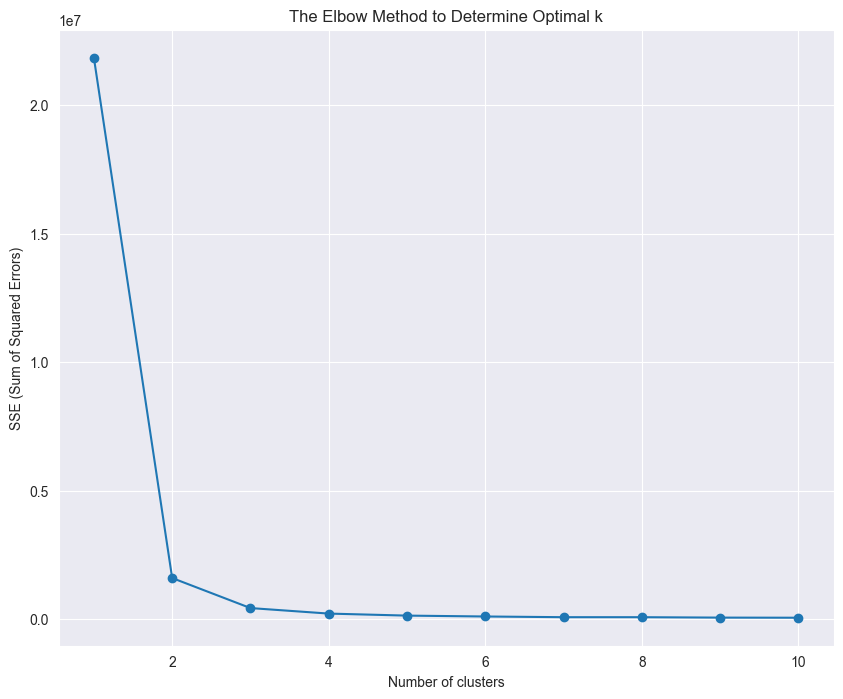

These are the clusters: [0 0 0 ... 0 0 0]
['season', 'player_id', 'firstname', 'lastname', 'age', 'height', 'weight', 'appearances', 'lineups', 'minutes_played', 'captain', 'substitutions_in', 'substitutions_out', 'bench_appearances', 'total_shots', 'shots_on_target', 'total_goals', 'assists', 'goals_conceded', 'saves', 'total_passes', 'key_passes', 'pass_accuracy', 'total_tackles', 'blocks', 'interceptions', 'total_duels', 'duels_won', 'dribble_attempts', 'successful_dribbles', 'dribbled_past', 'fouls_drawn', 'fouls_committed', 'yellow_cards', 'yellow_red_cards', 'red_cards', 'penalties_won', 'penalties_committed', 'penalties_scored', 'penalties_missed', 'penalties_saved', 'position_Attacker', 'position_Defender', 'position_Goalkeeper', 'position_Midfielder', 'appearances_normalized', 'lineups_normalized', 'minutes_played_normalized', 'substitutions_in_normalized', 'substitutions_out_normalized', 'Cluster']
***************
Cluster 0:
[('Sotirios', 'Kyrgiakos', 2010), ('Raul José', 'Tr

In [436]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
# Define the columns to drop
columns_to_drop = ['season', 'player_id', 'firstname', 'lastname', 'appearances', 'lineups', 'minutes_played', 
                   'substitutions_in', 'substitutions_out', 'bench_appearances']

x = filtered_data.copy()
# Select the columns to include for the model (all columns except the ones to drop)
clustering_data = x.drop(columns=columns_to_drop)
# Step 2: Choosing the number of clusters
# Use the Elbow method to find the optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_data)  # Fit the original data directly
    sse.append(kmeans.inertia_)

# Plot SSE for each *k*
plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.title('The Elbow Method to Determine Optimal k')
plt.show()

# Step 3: Apply K-means
k_optimal = 3  # Choose the optimal k after determining from the elbow method
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
clusters = kmeans.fit_predict(clustering_data)  # Predict using the unnormalized data
print(f"These are the clusters: {clusters}")

# Add cluster labels to your original DataFrame
filtered_data['Cluster'] = clusters

# Step 4: Analyze the Results
# Display the DataFrame with clusters
print(filtered_data.columns.to_list())

print('*' * 15)

# Group data by cluster
cluster_groups = filtered_data.groupby('Cluster')

# Print the players' first names, last names, and seasons in each cluster
for cluster, data in cluster_groups:
    print(f"Cluster {cluster}:")
    # Create a list of tuples containing 'firstname', 'lastname', and 'season'
    player_season_list = list(zip(data['firstname'], data['lastname'], data['season']))
    print(player_season_list)
    print("\n")  # Adds a newline for better separation between clusters

print('*' * 15)


Number of teams in each cluster:
Cluster
0    11359
1     4404
2     3207
Name: count, dtype: int64


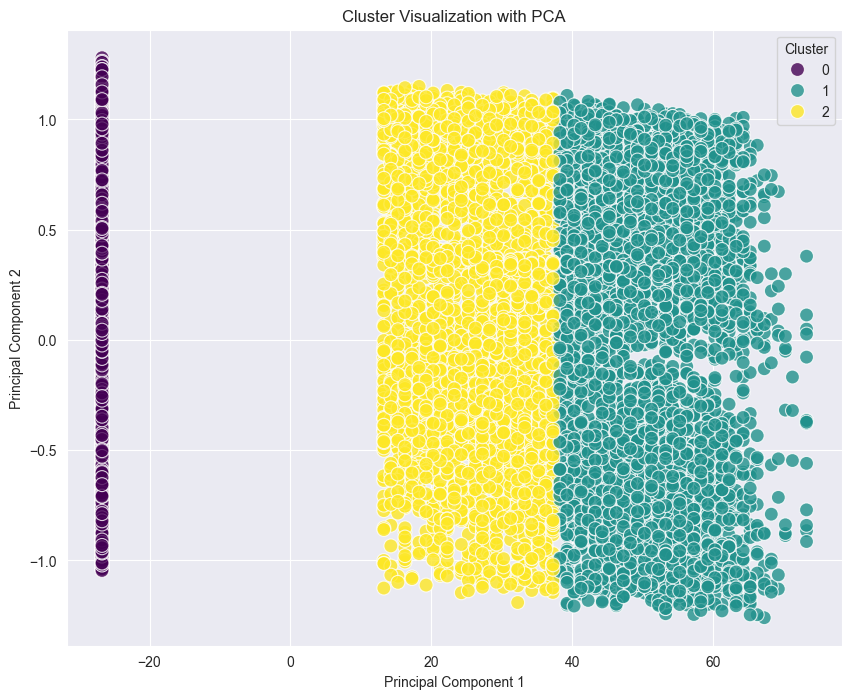

In [437]:
# plots to understand it better
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Count teams in each cluster
cluster_counts = filtered_data['Cluster'].value_counts()
print("Number of teams in each cluster:")
print(cluster_counts)

# Dimensionality reduction for visualization (using PCA for 2D visualization)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(clustering_data)

# Create a scatter plot of the two PCA components
plt.figure(figsize=(10, 8))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=filtered_data['Cluster'], palette='viridis', s=100, alpha=0.8)
plt.title('Cluster Visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


In [438]:
data


,season,player_id,firstname,lastname,age,height,weight,appearances,lineups,minutes_played,...,position_Attacker,position_Defender,position_Goalkeeper,position_Midfielder,appearances_normalized,lineups_normalized,minutes_played_normalized,substitutions_in_normalized,substitutions_out_normalized,Cluster
2825,2014,313,David,Ospina Ramírez,0.571429,0.557692,0.593220,18,18,1620,...,0,0,1,0,0.782609,0.782609,0.782609,0.000000,0.000000,2
2850,2014,2997,Łukasz Marek,Fabiański,0.657143,0.692308,0.694915,37,37,3308,...,0,0,1,0,1.000000,1.000000,0.993393,0.000000,0.000000,2
2912,2014,18891,Ciaran,Clark,0.542857,0.596154,0.779661,25,22,1992,...,0,1,0,0,0.781250,0.687500,0.691667,0.120000,0.160000,2
2932,2014,50869,Bradley Edwin,Guzan,0.685714,0.750000,0.881356,34,34,3060,...,0,0,1,0,0.894737,0.894737,0.894737,0.000000,0.000000,2
2963,2014,19526,Craig,Gardner,0.514286,0.461538,0.491525,35,30,2684,...,0,0,0,1,0.853659,0.731707,0.727371,0.142857,0.314286,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38265,2024,1442,Sead,Kolašinac,0.428571,0.557692,0.728814,7,7,587,...,0,1,0,0,1.000000,1.000000,0.931746,0.000000,0.428571,2
38266,2024,30421,Berat,Djimsiti,0.428571,0.692308,0.694915,11,11,924,...,0,1,0,0,1.000000,1.000000,0.933333,0.000000,0.090909,2
38331,2024,37604,Sam,Beukema,0.285714,0.653846,0.593220,12,11,1034,...,0,1,0,0,0.923077,0.846154,0.883761,0.083333,0.000000,2
38333,2024,1929,Jhon Janer,Lucumí Bonilla,0.285714,0.634615,0.711864,9,7,664,...,0,1,0,0,0.750000,0.583333,0.614815,0.222222,0.111111,2


In [440]:
for cluster, data in filtered_data.groupby('Cluster'):
    print(f"Cluster {cluster}:")
    # Create a list of tuples containing 'player', 'season', and 'position'
    player_season_position_list = list(zip(data['firstname'], data['lastname'], data['season'], data['position_Attacker'],data['position_Midfielder'], data['position_Defender'], data['position_Goalkeeper']))
    for player_info in player_season_position_list:
        print(f"Player {player_info[0]} {player_info[1]} at season {player_info[2]} isAttacker: {player_info[3]} isMidfielder: {player_info[4]} isDefender: {player_info[5]} is Goalie{player_info[6]}")
    print("\n")  # Adds a newline for better separation between clusters
    



Cluster 0:
Player Sotirios Kyrgiakos at season 2010 isAttacker: 0 isMidfielder: 0 isDefender: 1 is Goalie0
Player Raul José Trindade Meireles at season 2010 isAttacker: 0 isMidfielder: 1 isDefender: 0 is Goalie0
Player Dirk Kuijt at season 2010 isAttacker: 1 isMidfielder: 0 isDefender: 0 is Goalie0
Player Milan Jovanović at season 2010 isAttacker: 1 isMidfielder: 0 isDefender: 0 is Goalie0
Player Fábio Aurélio Rodrigues at season 2010 isAttacker: 0 isMidfielder: 0 isDefender: 1 is Goalie0
Player Fernando José Torres Sanz at season 2010 isAttacker: 1 isMidfielder: 0 isDefender: 0 is Goalie0
Player Martin Škrtel at season 2010 isAttacker: 0 isMidfielder: 0 isDefender: 1 is Goalie0
Player David N'Gog at season 2010 isAttacker: 1 isMidfielder: 0 isDefender: 0 is Goalie0
Player Maximiliano Rubén Rodríguez at season 2010 isAttacker: 1 isMidfielder: 0 isDefender: 0 is Goalie0
Player Javier Alejandro Mascherano at season 2010 isAttacker: 0 isMidfielder: 0 isDefender: 1 is Goalie0
Player Lucas 